Enter the stock ticker:  AAPL
Enter the number of days:  200


[*********************100%%**********************]  1 of 1 completed

Worst drawdown:
Lost: -12.02%
Period: 51 days
Initial date: 2023-09-05
Final date: 2023-10-26


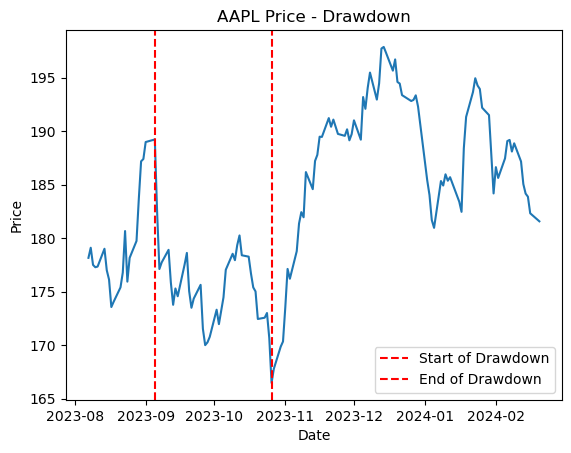

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.ticker as mtick
import matplotlib.dates as mdate
import pandas as pd
import numpy as np


# stock information

stock = input("Enter the stock ticker: ")
days = int(input("Enter the number of days: "))

date_final = dt.datetime.now()
date_initial = date_final - dt.timedelta(days=days)

price = yf.download(stock, date_initial, date_final)['Adj Close']

df = price.reset_index()
df.columns=['Date','Price']

# Max_Cumul: Keep the highest value of Price
df['Max_Cumul'] = df['Price'].cummax()

# Drawdown: Calculate the drawdown for each day
df['Drawdown'] = (df['Price'] / df['Max_Cumul'])-1

# DD_initial_date: is the initial date of drawdown

## first line is the same date
df.loc[0,'DD_initial_date'] = df.loc[0,'Date']

## following date is the logic, if 'Max_Cumul' is different than previous, so the 'DD_initial_date' is change for current date, otherwise, keep the previous date
for i in range(1, len(df)):
    if df['Max_Cumul'].iloc[i] != df['Max_Cumul'].iloc[i - 1]:
        df.loc[i,'DD_initial_date'] = df.loc[i,'Date']
    else:
        df.loc[i,'DD_initial_date'] = df.loc[i-1,'DD_initial_date']

#Identifying the worst drawdown 
min_drawdown = df['Drawdown'].min()*100

# Summary

## identify the index of the worst drawdown
idx_min_drawdown = df['Drawdown'].idxmin()

## identify the dates
final_min_drawdown = df.loc[idx_min_drawdown, 'Date']
initial_min_drawdown = df.loc[idx_min_drawdown, 'DD_initial_date']
period_min_drawdown = final_min_drawdown-initial_min_drawdown

## printing the summary
print("Worst drawdown:")
print("Lost:", f"{min_drawdown:.2f}%")
print("Period:",period_min_drawdown.days,"days")
print("Initial date:", initial_min_drawdown.strftime('%Y-%m-%d'))
print("Final date:", final_min_drawdown.strftime('%Y-%m-%d'))

# Plotting

plt.plot(df['Date'], df['Price'])

plt.axvline(x=initial_min_drawdown, color='red', linestyle='--', label='Start of Drawdown')
plt.axvline(x=final_min_drawdown, color='red', linestyle='--', label='End of Drawdown')

plt.title(f"{stock} Price - Drawdown")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()